In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, VotingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from joblib import load
import os
import re
from sklearn.metrics import mean_absolute_percentage_error

## IMPORTAR MODELOS DE REGRESION ENTRENADOS

In [2]:
# average_cluster_0=pd.read_csv("../data/interim/series_cluster_0.csv",parse_dates=["Date/Time"],index_col="Date/Time")
# average_cluster_1=pd.read_csv("../data/interim/series_cluster_1.csv",parse_dates=["Date/Time"],index_col="Date/Time")
# average_cluster_2=pd.read_csv("../data/interim/series_cluster_2.csv",parse_dates=["Date/Time"],index_col="Date/Time")
# average_cluster_3=pd.read_csv("../data/interim/series_cluster_3.csv",parse_dates=["Date/Time"],index_col="Date/Time")

In [3]:
# closest_cluster_0=pd.read_csv("../data/interim/without_closest_cluster_0.csv",parse_dates=["Date/Time"],index_col="Date/Time")
# closest_cluster_1=pd.read_csv("../data/interim/without_closest_cluster_1.csv",parse_dates=["Date/Time"],index_col="Date/Time")
# closest_cluster_2=pd.read_csv("../data/interim/without_closest_cluster_2.csv",parse_dates=["Date/Time"],index_col="Date/Time")
# closest_cluster_3=pd.read_csv("../data/interim/without_closest_cluster_3.csv",parse_dates=["Date/Time"],index_col="Date/Time")

In [4]:
modelo_average_cluster_0= load('../models/modelo_average_cluster_0.joblib')
scaler_average_cluster_0= load('../models/scaler_average_cluster_0.joblib')
modelo_average_cluster_1= load('../models/modelo_average_cluster_1.joblib')
scaler_average_cluster_1= load('../models/scaler_average_cluster_1.joblib')
modelo_average_cluster_2= load('../models/modelo_average_cluster_2.joblib')
scaler_average_cluster_2= load('../models/scaler_average_cluster_2.joblib')
modelo_average_cluster_3= load('../models/modelo_average_cluster_3.joblib')
scaler_average_cluster_3= load('../models/scaler_average_cluster_3.joblib')
modelo_average_cluster_4= load('../models/modelo_average_cluster_4.joblib')
scaler_average_cluster_4= load('../models/scaler_average_cluster_4.joblib')

In [5]:
modelo_closest_cluster_0= load('../models/modelo_closest_cluster_0.joblib')
scaler_closest_cluster_0= load('../models/scaler_closest_cluster_0.joblib')
modelo_closest_cluster_1= load('../models/modelo_closest_cluster_1.joblib')
scaler_closest_cluster_1= load('../models/scaler_closest_cluster_1.joblib')
modelo_closest_cluster_2= load('../models/modelo_closest_cluster_2.joblib')
scaler_closest_cluster_2= load('../models/scaler_closest_cluster_2.joblib')
modelo_closest_cluster_3= load('../models/modelo_closest_cluster_3.joblib')
scaler_closest_cluster_3= load('../models/scaler_closest_cluster_3.joblib')


In [6]:
def smape(y_true, y_pred):
    return 100 * np.mean(2 * np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred)))

## IMPORTAR DATOS PARA LAS PRUEBAS

In [7]:
# Especifica el directorio donde están los archivos CSV
carpeta ="../data/raw/"
# Obtén la lista de todos los archivos en la carpeta
archivos = os.listdir(carpeta)
# Define the columns to keep
columns_to_keep = [
    'Date/Time',
    'Electricity:Facility [kW](Hourly)',
    'Fans:Electricity [kW](Hourly)',
    'Cooling:Electricity [kW](Hourly)',
    'Heating:Electricity [kW](Hourly)',
    'InteriorLights:Electricity [kW](Hourly)',
    'InteriorEquipment:Electricity [kW](Hourly)'
]
# Load and concatenate data from all files
dfs = []
for file in archivos:
    df = pd.read_csv(f"../data/raw/{file}", usecols=columns_to_keep)
    df["Date/Time"] = '2004 ' + df["Date/Time"]
    date_format = '%Y %m/%d %H:%M:%S'
    df["Date/Time"] = pd.to_datetime(df["Date/Time"], format=date_format, errors='coerce')
    match = re.match(r'^[^_]+', file)
    name = match.group(0)
    df["type_building"] = name
    dfs.append(df)

In [8]:
#se extraen los datos clusterizados
data_clustered=pd.read_csv("../data/interim/clustering_all_characteristics.csv")

In [9]:
data_clustered.head()

,type_building,Cooling:Electricity_mean,Cooling:Electricit_std,InteriorEquipment:Electricity_mean,InteriorEquipment:Electricity_std,cluster_GMM
0,RefBldgFullServiceRestaurantNew2004,0.000000,6.226848,19.4245,7.265027,0
1,RefBldgFullServiceRestaurantNew2004,0.001580,6.596764,19.4245,7.265027,0
2,RefBldgFullServiceRestaurantNew2004,0.002568,7.146033,19.4245,7.265027,0
3,RefBldgFullServiceRestaurantNew2004,0.000000,4.688730,19.4245,7.265027,0
4,RefBldgFullServiceRestaurantNew2004,0.000000,4.797245,19.4245,7.265027,0


In [10]:
#se cargan los datos mas cercanos a los clusters
closest_points_data=pd.read_csv("../data/interim/closest_points.csv")
closest_points_data=closest_points_data.rename(columns={"Unnamed: 0":"indice_closest"})
closest_points_data

,indice_closest,PC1,PC2,PC3,Cluster_KMeans,Cluster_DBSCAN,Cluster_Hierarchical
0,67,-1.122322,-0.026253,0.075707,0,10,0
1,15,4.515147,1.414719,-1.786065,1,-1,1
2,5,5.561883,-2.633525,0.505042,2,-1,2
3,45,2.758477,2.785423,1.366780,1,-1,3


In [11]:
#OBTENER LAS SERIES MAS CERCANAS PARA CADA CLUSTER
indices_clusters=closest_points_data.indice_closest.unique().tolist()
closest_series=[]
for indice in indices_clusters:
    closest_series.append(dfs[indice])

In [12]:
data_clustered

,type_building,Cooling:Electricity_mean,Cooling:Electricit_std,InteriorEquipment:Electricity_mean,InteriorEquipment:Electricity_std,cluster_GMM
0,RefBldgFullServiceRestaurantNew2004,0.000000,6.226848,19.4245,7.265027,0
1,RefBldgFullServiceRestaurantNew2004,0.001580,6.596764,19.4245,7.265027,0
2,RefBldgFullServiceRestaurantNew2004,0.002568,7.146033,19.4245,7.265027,0
3,RefBldgFullServiceRestaurantNew2004,0.000000,4.688730,19.4245,7.265027,0
4,RefBldgFullServiceRestaurantNew2004,0.000000,4.797245,19.4245,7.265027,0
...,...,...,...,...,...,...
75,RefBldgWarehouseNew2004,0.000000,3.543234,1.0116,3.418924,0
76,RefBldgWarehouseNew2004,0.000000,3.778460,1.0116,3.418924,0
77,RefBldgWarehouseNew2004,0.000000,3.968506,1.0116,3.418924,0
78,RefBldgWarehouseNew2004,0.000000,2.526466,1.0116,3.418924,0


### OBTENER DATOS DE PRUEBA PARA LOS MODELOS ENTRENADOS CON LAS SERIE PROMEDIO DE CADA CLUSTER 

In [13]:
# Agrupar dataframes por cluster
clusters = data_clustered['cluster_GMM'].unique()
average_dfs = {cluster: [] for cluster in clusters}

for i, df in enumerate(dfs):
    cluster = data_clustered.loc[i, 'cluster_GMM']
    # Agregar el DataFrame al diccionario correspondiente al cluster
    average_dfs[cluster].append(df)

In [14]:
average_dfs[0][1]

,Date/Time,Electricity:Facility [kW](Hourly),Fans:Electricity [kW](Hourly),Cooling:Electricity [kW](Hourly),Heating:Electricity [kW](Hourly),InteriorLights:Electricity [kW](Hourly),InteriorEquipment:Electricity [kW](Hourly),type_building
0,2004-01-01 01:00:00,22.681885,3.99356,0.0,0.0,4.589925,8.1892,RefBldgFullServiceRestaurantNew2004
1,2004-01-01 02:00:00,14.862625,0.00000,0.0,0.0,1.529975,7.4902,RefBldgFullServiceRestaurantNew2004
2,2004-01-01 03:00:00,14.887749,0.00000,0.0,0.0,1.529975,7.4902,RefBldgFullServiceRestaurantNew2004
3,2004-01-01 04:00:00,14.876188,0.00000,0.0,0.0,1.529975,7.4902,RefBldgFullServiceRestaurantNew2004
4,2004-01-01 05:00:00,15.002609,0.00000,0.0,0.0,1.529975,7.4902,RefBldgFullServiceRestaurantNew2004
...,...,...,...,...,...,...,...,...
8755,2004-12-31 20:00:00,38.656444,3.99356,0.0,0.0,9.179851,19.4245,RefBldgFullServiceRestaurantNew2004
8756,2004-12-31 21:00:00,38.635558,3.99356,0.0,0.0,9.179851,19.4245,RefBldgFullServiceRestaurantNew2004
8757,2004-12-31 22:00:00,38.574583,3.99356,0.0,0.0,9.179851,19.4245,RefBldgFullServiceRestaurantNew2004
8758,2004-12-31 23:00:00,38.466688,3.99356,0.0,0.0,9.179851,19.4245,RefBldgFullServiceRestaurantNew2004


### OBTENER DATOS DE PRUEBA PARA LOS MODELOS ENTRENADOS CON LAS SERIE MAS CERCANA DE CADA CLUSTER 

In [15]:
indices_clusters = closest_points_data.indice_closest.unique().tolist()

# Filtrar la lista de DataFrames eliminando aquellos en los índices de indices_clusters
dfs_actualizados = [df for i, df in enumerate(dfs) if i not in indices_clusters]

In [21]:
# Agrupar dataframes por cluster
clusters = data_clustered['cluster_GMM'].unique()
closest_dfs = {cluster: [] for cluster in clusters}

for i, df in enumerate(dfs_actualizados):
    cluster = data_clustered.loc[i, 'cluster_GMM']
    closest_dfs[cluster].append(df)

# PRUEBAS CLUSTER 0

## closest

In [14]:
# Inicializar variables para acumular resultados
rmse_list = []
smape_list = []
# Lista de columnas para análisis
columnas = ['Fans:Electricity [kW](Hourly)', 'Cooling:Electricity [kW](Hourly)',
       'InteriorLights:Electricity [kW](Hourly)',
       'InteriorEquipment:Electricity [kW](Hourly)', 'hour', 'day_of_week',
       'month']

for df_serie in closest_dfs[0]:
    df=df_serie.copy()
    df["Date/Time"]=pd.to_datetime(df["Date/Time"])
    df.set_index("Date/Time",inplace=True)
    # Extraer características temporales
    df['hour'] = df.index.hour
    df['day_of_week'] = df.index.dayofweek
    df['month'] = df.index.month
    
    X = df.loc[:, columnas].copy()
    y = df.loc[:, 'Electricity:Facility [kW](Hourly)'].copy()
    
    # Escalar las características
    X_scaled = scaler_closest_cluster_0.transform(X)
    
    # Predecir y calcular métricas de error
    y_pred = modelo_closest_cluster_0.predict(X_scaled)
    rmse = np.sqrt(mean_squared_error(y, y_pred))
    smape_value = smape(y, y_pred)  # Calcular sMAPE
    
    # Almacenar resultados
    rmse_list.append(rmse)
    smape_list.append(smape_value)

# Calcular promedios de las métricas de error
average_rmse = np.mean(rmse_list)
average_smape = np.mean(smape_list)

# Resultados
results = {
    "Metricas del modelo": {
        'Average RMSE': average_rmse,
        'Average sMAPE (%)': average_smape
    }
}


In [15]:
# Mostrar los resultados
print("Resultados del modelo:")
optimized_rf_results_df=pd.DataFrame(results)
optimized_rf_results_df

Resultados del modelo:


,Metricas del modelo
Average RMSE,76.949376
Average sMAPE (%),52.271431


In [16]:
rmse_list

[6.124977211781756,
 6.1278036919600725,
 6.197875105992481,
 6.026074754707554,
 6.025296315720119,
 203.70755366176908,
 205.00498602915061,
 194.4453555257644,
 194.97655537691267,
 830.6193049863855,
 54.69345000469319,
 61.693343187307306,
 58.79954007173386,
 4.830397025863422,
 4.8093800977265095,
 4.814209001054319,
 4.796775708364841,
 4.81574280283526,
 108.88649989163953,
 106.42613645929026,
 107.93942627931271,
 108.23492192095583,
 106.62639512881027,
 70.84029433481471,
 71.61286768329569,
 73.32792465189345,
 66.43049626922893,
 66.77146102112283,
 5.796299815774096,
 5.76197361871275,
 5.744187582670508,
 5.855106404705105,
 5.834105355981151,
 457.1233357849169,
 473.6878822321656,
 22.04843267954875,
 20.694731129053864,
 10.86641495139946,
 10.83659267562603,
 10.817813108599374,
 10.943746129395652,
 10.934001678318582,
 5.439815304191012,
 5.423381679651442,
 5.400858204763316,
 5.397140137813658,
 5.4127557749034505,
 0.6777456211589287,
 0.719578159637776,
 0.99

## Average

In [17]:
# Inicializar variables para acumular resultados
rmse_list = []
smape_list = []

In [22]:
# Lista de columnas para análisis
columnas = ['Fans:Electricity [kW](Hourly)', 'Cooling:Electricity [kW](Hourly)',
            'InteriorLights:Electricity [kW](Hourly)',
            'InteriorEquipment:Electricity [kW](Hourly)','hour','day_of_week',
            'month']
to_scale = ['Fans:Electricity [kW](Hourly)', 'Cooling:Electricity [kW](Hourly)',
       'InteriorLights:Electricity [kW](Hourly)',
       'InteriorEquipment:Electricity [kW](Hourly)']
for df_serie in average_dfs[0]:
    df = df_serie.copy()
    df["Date/Time"] = pd.to_datetime(df["Date/Time"])
    df.set_index("Date/Time", inplace=True)
    # Extraer características temporales
    df['hour'] = df.index.hour
    df['day_of_week'] = df.index.dayofweek
    df['month'] = df.index.month
    df.dropna(inplace=True)
    X = df.loc[:, columnas].copy()
    y = df.loc[:, 'Electricity:Facility [kW](Hourly)'].copy()
    
    # Escalar las características
    X.loc[:,to_scale]= scaler_average_cluster_0.transform(X[to_scale])
    # Predecir y calcular métricas de error
    y_pred = modelo_average_cluster_0.predict(X)
    rmse = np.sqrt(mean_squared_error(y, y_pred))
    smape_value = smape(y, y_pred)  # Calcular sMAPE
    
    # Almacenar resultados
    rmse_list.append(rmse)
    smape_list.append(smape_value)

# Calcular promedios de las métricas de error
average_rmse = np.mean(rmse_list)
average_smape = np.mean(smape_list)

# Resultados
results = {
    "Metricas del modelo": {
        'Average RMSE': average_rmse,
        'Average sMAPE (%)': average_smape
    }
}


In [23]:
# Mostrar los resultados
print("Resultados del modelo:")
optimized_rf_results_df=pd.DataFrame(results)
optimized_rf_results_df

Resultados del modelo:


,Metricas del modelo
Average RMSE,34.693833
Average sMAPE (%),52.846308


In [24]:
rmse_list

[10.132913488835282,
 10.09284084568747,
 10.12753335454605,
 10.145873434179444,
 10.096038765829457,
 51.17238094237419,
 48.77023689793366,
 49.66512228936456,
 53.33538035757703,
 49.99465582727519,
 12.135466347440943,
 12.04252427393188,
 11.942042670740362,
 12.348801506094887,
 12.298856024249181,
 57.12055579588393,
 58.39040485096886,
 60.389015623448856,
 52.61986185468076,
 52.87540134596781,
 10.938171900876247,
 10.875676199802092,
 10.806180345149928,
 11.095429041191633,
 11.07746646705581,
 11.476098658638195,
 11.260692065570067,
 11.35440244368718,
 12.034964305789781,
 11.461886753756263,
 21.318844829071747,
 21.315265291146634,
 21.332166214300027,
 21.303530537476107,
 21.319785238207974,
 22.631105700601235,
 22.636440892892637,
 22.662155380445107,
 22.758993432100688,
 22.69739969604255,
 25.9027208059093,
 25.768768094909795,
 25.604786007257783,
 26.357120302345834,
 26.288799142744505,
 141.26738023933234,
 144.8292402306097,
 147.39989445226524,
 139.08380

In [25]:
import matplotlib.pyplot as plt
import pandas as pd

# Seleccionar una serie de tiempo representativa para comparar (puedes cambiar el índice [0])
df_serie = closest_dfs[0][0].copy()

# Preprocesamiento de la serie
df_serie["Date/Time"] = pd.to_datetime(df_serie["Date/Time"])
df_serie.set_index("Date/Time", inplace=True)
df_serie['hour'] = df_serie.index.hour
df_serie['day_of_week'] = df_serie.index.dayofweek
df_serie['month'] = df_serie.index.month

X = df_serie.loc[:, columnas].copy()
y = df_serie.loc[:, 'Electricity:Facility [kW](Hourly)'].copy()

# Predicción con el modelo closest
X_scaled_closest = scaler_closest_cluster_0.transform(X)
y_pred_closest = modelo_closest_cluster_0.predict(X_scaled_closest)

# Predicción con el modelo average (usando la misma serie de tiempo)
X_scaled_average = scaler_average_cluster_0.transform(X)
y_pred_average = modelo_average_cluster_0.predict(X_scaled_average)

# Ampliar un intervalo de tiempo más corto para una comparación más clara
start_date = '2004-01-01'
end_date = '2004-01-25'  # Un rango de tiempo más largo para observar las diferencias

# Crear las gráficas
plt.figure(figsize=(14, 14))

# Gráfica 1: Serie Original
plt.subplot(3, 1, 1)
plt.plot(y.index, y, label='Original Series')
plt.xlabel('Date')
plt.ylabel('Electricity:Facility [kW](Hourly)')
plt.legend()

# Gráfica 2: Predicción Closest Model
plt.subplot(3, 1, 2)
plt.plot(y.index, y_pred_closest, label='Closest Model Prediction', color='orange')
plt.xlabel('Date')
plt.ylabel('Electricity:Facility [kW](Hourly)')
plt.legend()

# Gráfica 3: Predicción Average Model
plt.subplot(3, 1, 3)
plt.plot(y.index, y_pred_average, label='Average Model Prediction', color='green')
plt.xlabel('Date')
plt.ylabel('Electricity:Facility [kW](Hourly)')
plt.legend()

# Ajustar el layout
plt.tight_layout()
plt.savefig('../data/images/comparacion_series_tiempo_cluster0.png')
plt.show()

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- day_of_week
- hour
- month


In [26]:
import matplotlib.pyplot as plt

# Ampliar un intervalo de tiempo más corto para una comparación más clara
start_date = '2004-06-01'
end_date = '2004-06-07'  # Un rango de tiempo más largo para observar las diferencias

# Filtrar los datos por este rango
y_filtered = y[(y.index >= start_date) & (y.index <= end_date)]
y_pred_closest_filtered = y_pred_closest[(y.index >= start_date) & (y.index <= end_date)]
y_pred_average_filtered = y_pred_average[(y.index >= start_date) & (y.index <= end_date)]

# Graficar
plt.figure(figsize=(14, 7))

# Serie original
plt.plot(y_filtered.index, y_filtered, label='Original Series', color='blue', alpha=0.8, linewidth=2)

# Predicción del modelo closest
plt.plot(y_filtered.index, y_pred_closest_filtered, label='Closest Model Prediction', color='orange', linestyle='--', alpha=0.7, linewidth=2)

# Predicción del modelo average
plt.plot(y_filtered.index, y_pred_average_filtered, label='Average Model Prediction', color='green', linestyle=':', alpha=0.7, linewidth=2)

plt.xlabel('Date')
plt.ylabel('Electricity:Facility [kW](Hourly)')
plt.legend()
plt.grid(True)
plt.savefig('../data/images/comparacion_series_tiempo_cluster0_filtered.png')
plt.show()


NameError: name 'y_pred_average' is not defined

# PRUEBAS CLUSTER 1

## closest

In [22]:
# Lista de columnas para análisis
columnas = ['Fans:Electricity [kW](Hourly)', 'Cooling:Electricity [kW](Hourly)',
       'InteriorLights:Electricity [kW](Hourly)',
       'InteriorEquipment:Electricity [kW](Hourly)', 'hour', 'day_of_week',
       'month']
# Inicializar variables para acumular resultados
rmse_list = []
smape_list = []
for df_serie in closest_dfs[1]:
    df=df_serie.copy()
    df["Date/Time"]=pd.to_datetime(df["Date/Time"])
    df.set_index("Date/Time",inplace=True)
    # Extraer características temporales
    df['hour'] = df.index.hour
    df['day_of_week'] = df.index.dayofweek
    df['month'] = df.index.month
    
    X = df.loc[:, columnas].copy()
    y = df.loc[:, 'Electricity:Facility [kW](Hourly)'].copy()
    
    # Escalar las características
    X_scaled = scaler_closest_cluster_1.transform(X)
    
    # Predecir y calcular métricas de error
    y_pred = modelo_closest_cluster_1.predict(X_scaled)
    rmse = np.sqrt(mean_squared_error(y, y_pred))
    smape_value = smape(y, y_pred)  # Calcular sMAPE
    
    # Almacenar resultados
    rmse_list.append(rmse)
    smape_list.append(smape_value)

# Calcular promedios de las métricas de error
average_rmse = np.mean(rmse_list)
average_smape = np.mean(smape_list)

# Resultados
results = {
    "Metricas del modelo": {
        'Average RMSE': average_rmse,
        'Average sMAPE (%)': average_smape
    }
}

In [23]:
# Mostrar los resultados
print("Resultados del modelo")
optimized_rf_results_df=pd.DataFrame(results)
optimized_rf_results_df

Resultados del modelo


,Metricas del modelo
Average RMSE,101.841944
Average sMAPE (%),49.170538


## Average

In [27]:
# Lista de columnas para análisis
columnas = ['Fans:Electricity [kW](Hourly)', 'Cooling:Electricity [kW](Hourly)',
       'InteriorLights:Electricity [kW](Hourly)',
       'InteriorEquipment:Electricity [kW](Hourly)', 'hour', 'day_of_week',
       'month']
to_scale = ['Fans:Electricity [kW](Hourly)', 'Cooling:Electricity [kW](Hourly)',
       'InteriorLights:Electricity [kW](Hourly)',
       'InteriorEquipment:Electricity [kW](Hourly)']
# Inicializar variables para acumular resultados
rmse_list = []
smape_list = []
for df_serie in average_dfs[1]:
    df=df_serie.dropna().copy()
    df["Date/Time"]=pd.to_datetime(df["Date/Time"])
    df.set_index("Date/Time",inplace=True)
    # Extraer características temporales
    df['hour'] = df.index.hour
    df['day_of_week'] = df.index.dayofweek
    df['month'] = df.index.month
    
    X = df.loc[:, columnas].copy()
    y = df.loc[:, 'Electricity:Facility [kW](Hourly)'].copy()
    
    # Escalar las características
    X.loc[:,to_scale]= scaler_average_cluster_1.transform(X[to_scale])
    # Predecir y calcular métricas de error
    y_pred = modelo_average_cluster_1.predict(X)
    rmse = np.sqrt(mean_squared_error(y, y_pred))
    smape_value = smape(y, y_pred)  # Calcular sMAPE
    
    # Almacenar resultados
    rmse_list.append(rmse)
    smape_list.append(smape_value)

# Calcular promedios de las métricas de error
average_rmse = np.mean(rmse_list)
average_smape = np.mean(smape_list)

# Resultados
results = {
    "Metricas del modelo": {
        'Average RMSE': average_rmse,
        'Average sMAPE (%)': average_smape
    }
}

In [28]:
# Mostrar los resultados
print("Resultados del modelo")
optimized_rf_results_df=pd.DataFrame(results)
optimized_rf_results_df

Resultados del modelo


,Metricas del modelo
Average RMSE,26.762282
Average sMAPE (%),2.203350


In [29]:
rmse_list

[27.025010604981905,
 27.720295012939147,
 30.10666229082391,
 24.13306246982883,
 24.826378503869115]

In [66]:
import matplotlib.pyplot as plt
import pandas as pd

# Seleccionar una serie de tiempo representativa para comparar (puedes cambiar el índice [0])
df_serie = closest_dfs[1][0].copy()

# Preprocesamiento de la serie
df_serie["Date/Time"] = pd.to_datetime(df_serie["Date/Time"])
df_serie.set_index("Date/Time", inplace=True)
df_serie['hour'] = df_serie.index.hour
df_serie['day_of_week'] = df_serie.index.dayofweek
df_serie['month'] = df_serie.index.month

X = df_serie.loc[:, columnas].copy()
y = df_serie.loc[:, 'Electricity:Facility [kW](Hourly)'].copy()

# Predicción con el modelo closest
X_scaled_closest = scaler_closest_cluster_1.transform(X)
y_pred_closest = modelo_closest_cluster_1.predict(X_scaled_closest)

# Predicción con el modelo average (usando la misma serie de tiempo)
X_scaled_average = scaler_average_cluster_1.transform(X)
y_pred_average = modelo_average_cluster_1.predict(X_scaled_average)

# Ampliar un intervalo de tiempo más corto para una comparación más clara
start_date = '2004-01-01'
end_date = '2004-01-25'  # Un rango de tiempo más largo para observar las diferencias

# Crear las gráficas
plt.figure(figsize=(14, 14))

# Gráfica 1: Serie Original
plt.subplot(3, 1, 1)
plt.plot(y.index, y, label='Original Series')
plt.xlabel('Date')
plt.ylabel('Electricity:Facility [kW](Hourly)')
plt.legend()

# Gráfica 2: Predicción Closest Model
plt.subplot(3, 1, 2)
plt.plot(y.index, y_pred_closest, label='Closest Model Prediction', color='orange')
plt.xlabel('Date')
plt.ylabel('Electricity:Facility [kW](Hourly)')
plt.legend()

# Gráfica 3: Predicción Average Model
plt.subplot(3, 1, 3)
plt.plot(y.index, y_pred_average, label='Average Model Prediction', color='green')
plt.xlabel('Date')
plt.ylabel('Electricity:Facility [kW](Hourly)')
plt.legend()

# Ajustar el layout
plt.tight_layout()
plt.savefig('../data/images/comparacion_series_tiempo_cluster1.png')
plt.show()

NameError: name 'closest_dfs' is not defined

In [67]:
import matplotlib.pyplot as plt

# Ampliar un intervalo de tiempo más corto para una comparación más clara
start_date = '2004-01-01'
end_date = '2004-01-07'  # Un rango de tiempo más largo para observar las diferencias

# Filtrar los datos por este rango
y_filtered = y[(y.index >= start_date) & (y.index <= end_date)]
y_pred_closest_filtered = y_pred_closest[(y.index >= start_date) & (y.index <= end_date)]
y_pred_average_filtered = y_pred_average[(y.index >= start_date) & (y.index <= end_date)]

# Graficar
plt.figure(figsize=(14, 7))

# Serie original
plt.plot(y_filtered.index, y_filtered, label='Original Series', color='blue', alpha=0.8, linewidth=2)

# Predicción del modelo closest
plt.plot(y_filtered.index, y_pred_closest_filtered, label='Closest Model Prediction', color='orange', linestyle='--', alpha=0.7, linewidth=2)

# Predicción del modelo average
plt.plot(y_filtered.index, y_pred_average_filtered, label='Average Model Prediction', color='green', linestyle=':', alpha=0.7, linewidth=2)

plt.xlabel('Date')
plt.ylabel('Electricity:Facility [kW](Hourly)')
plt.legend()
plt.grid(True)
plt.savefig('../data/images/comparacion_series_tiempo_cluster1_filtered.png')
plt.show()


NameError: name 'y_pred_closest' is not defined

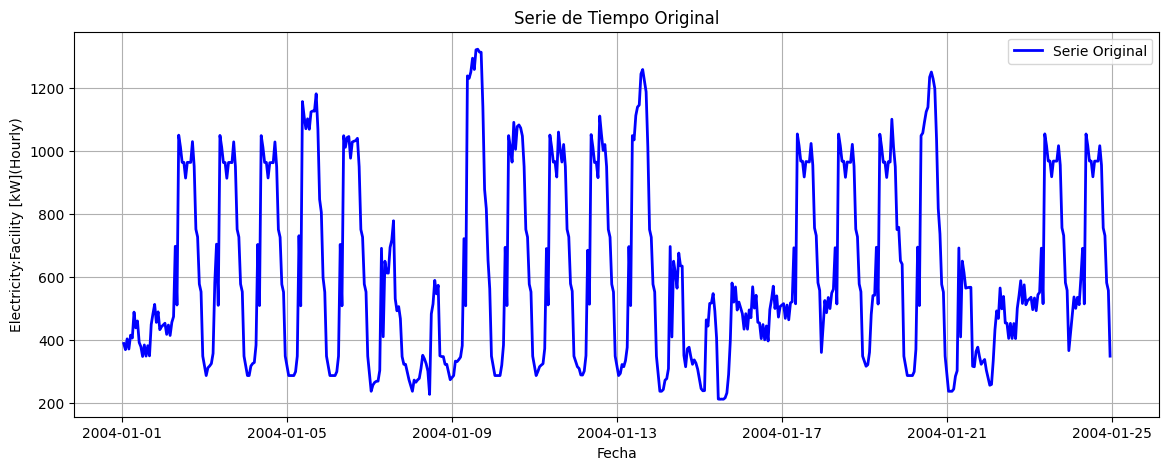

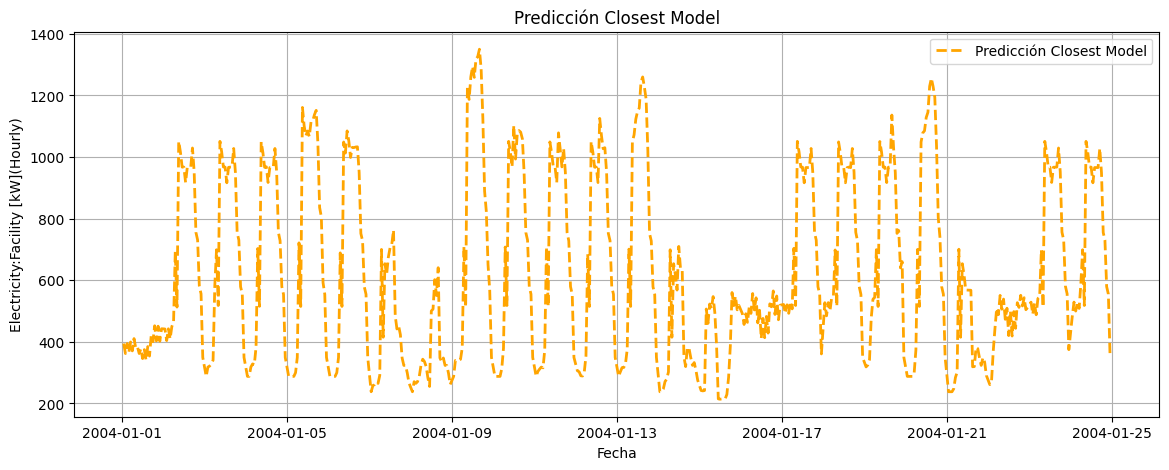

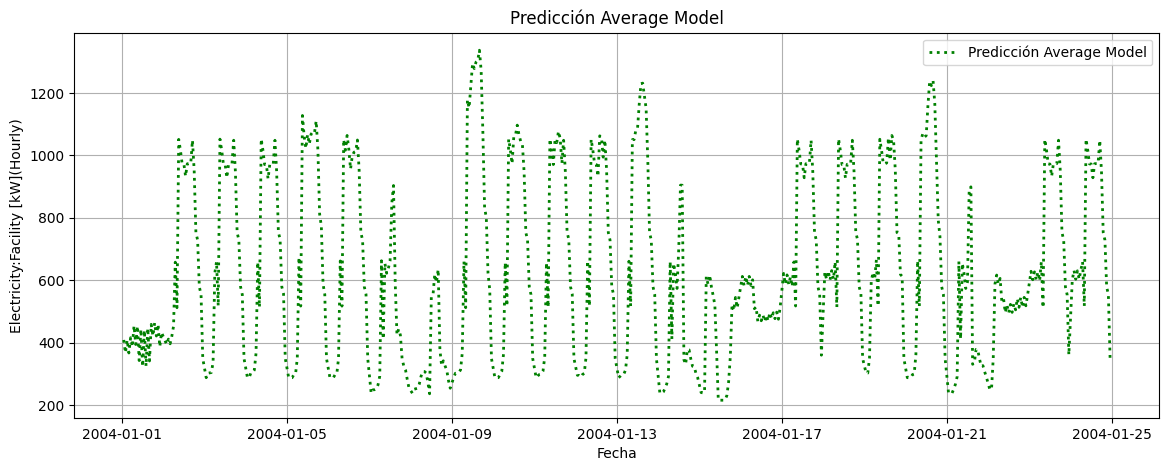

In [33]:
import matplotlib.pyplot as plt

# Ampliar un intervalo de tiempo más corto para una comparación más clara
start_date = '2004-01-01'
end_date = '2004-01-25'  # Rango de fechas específico

# Filtrar los datos por este rango
y_filtered = y[(y.index >= start_date) & (y.index <= end_date)]
y_pred_closest_filtered = y_pred_closest[(y.index >= start_date) & (y.index <= end_date)]
y_pred_average_filtered = y_pred_average[(y.index >= start_date) & (y.index <= end_date)]

# Graficar Serie Original
plt.figure(figsize=(14, 5))
plt.plot(y_filtered.index, y_filtered, label='Serie Original', color='blue', linewidth=2)
plt.xlabel('Fecha')
plt.ylabel('Electricity:Facility [kW](Hourly)')
plt.title('Serie de Tiempo Original')
plt.legend()
plt.grid(True)
plt.show()

# Graficar Predicción Closest Model
plt.figure(figsize=(14, 5))
plt.plot(y_filtered.index, y_pred_closest_filtered, label='Predicción Closest Model', color='orange', linestyle='--', linewidth=2)
plt.xlabel('Fecha')
plt.ylabel('Electricity:Facility [kW](Hourly)')
plt.title('Predicción Closest Model')
plt.legend()
plt.grid(True)
plt.show()

# Graficar Predicción Average Model
plt.figure(figsize=(14, 5))
plt.plot(y_filtered.index, y_pred_average_filtered, label='Predicción Average Model', color='green', linestyle=':', linewidth=2)
plt.xlabel('Fecha')
plt.ylabel('Electricity:Facility [kW](Hourly)')
plt.title('Predicción Average Model')
plt.legend()
plt.grid(True)
plt.show()


# PRUEBAS CLUSTER 2

## Closest

In [30]:
# Lista de columnas para análisis
columnas = ['Fans:Electricity [kW](Hourly)', 'Cooling:Electricity [kW](Hourly)',
       'InteriorLights:Electricity [kW](Hourly)',
       'InteriorEquipment:Electricity [kW](Hourly)', 'hour', 'day_of_week',
       'month']
to_scale = ['Fans:Electricity [kW](Hourly)', 'Cooling:Electricity [kW](Hourly)',
       'InteriorLights:Electricity [kW](Hourly)',
       'InteriorEquipment:Electricity [kW](Hourly)']
# Inicializar variables para acumular resultados
rmse_list = []
smape_list = []
for df_serie in closest_dfs[2]:
    df=df_serie.copy()
    df["Date/Time"]=pd.to_datetime(df["Date/Time"])
    df.set_index("Date/Time",inplace=True)
    # Extraer características temporales
    df['hour'] = df.index.hour
    df['day_of_week'] = df.index.dayofweek
    df['month'] = df.index.month
    
    X = df.loc[:, columnas].copy()
    y = df.loc[:, 'Electricity:Facility [kW](Hourly)'].copy()
    
    # Escalar las características
    X.loc[:,to_scale]= scaler_average_cluster_2.transform(X[to_scale])
    # Predecir y calcular métricas de error
    y_pred = modelo_average_cluster_2.predict(X)
    rmse = np.sqrt(mean_squared_error(y, y_pred))
    smape_value = smape(y, y_pred)  # Calcular sMAPE
    
    # Almacenar resultados
    rmse_list.append(rmse)
    smape_list.append(smape_value)

# Calcular promedios de las métricas de error
average_rmse = np.mean(rmse_list)
average_smape = np.mean(smape_list)

# Resultados
results = {
    "Metricas del modelo": {
        'Average RMSE': average_rmse,
        'Average sMAPE (%)': average_smape
    }
}


In [31]:
# Mostrar los resultados
print("Resultados del modelo ")
optimized_rf_results_df=pd.DataFrame(results)
optimized_rf_results_df

Resultados del modelo 


,Metricas del modelo
Average RMSE,81.886637
Average sMAPE (%),16.194386


## Average

In [32]:
# Lista de columnas para análisis
columnas = ['Fans:Electricity [kW](Hourly)', 'Cooling:Electricity [kW](Hourly)',
       'InteriorLights:Electricity [kW](Hourly)',
       'InteriorEquipment:Electricity [kW](Hourly)', 'hour', 'day_of_week',
       'month']
to_scale = ['Fans:Electricity [kW](Hourly)', 'Cooling:Electricity [kW](Hourly)',
       'InteriorLights:Electricity [kW](Hourly)',
       'InteriorEquipment:Electricity [kW](Hourly)']
# Inicializar variables para acumular resultados
rmse_list = []
smape_list = []
for df_serie in average_dfs[2]:
    df=df_serie.dropna().copy()
    df["Date/Time"]=pd.to_datetime(df["Date/Time"])
    df.set_index("Date/Time",inplace=True)
    # Extraer características temporales
    df['hour'] = df.index.hour
    df['day_of_week'] = df.index.dayofweek
    df['month'] = df.index.month
    
    X = df.loc[:, columnas].copy()
    y = df.loc[:, 'Electricity:Facility [kW](Hourly)'].copy()
    
    # Escalar las características
    X.loc[:,to_scale]= scaler_average_cluster_2.transform(X[to_scale])
    # Predecir y calcular métricas de error
    y_pred = modelo_average_cluster_2.predict(X)
    rmse = np.sqrt(mean_squared_error(y, y_pred))
    smape_value = smape(y, y_pred)  # Calcular sMAPE
    
    # Almacenar resultados
    rmse_list.append(rmse)
    smape_list.append(smape_value)

# Calcular promedios de las métricas de error
average_rmse = np.mean(rmse_list)
average_smape = np.mean(smape_list)

# Resultados
results = {
    "Metricas del modelo": {
        'Average RMSE': average_rmse,
        'Average sMAPE (%)': average_smape
    }
}


In [33]:
# Mostrar los resultados
print("Resultados del modelo")
optimized_rf_results_df=pd.DataFrame(results)
optimized_rf_results_df

Resultados del modelo


,Metricas del modelo
Average RMSE,23.388432
Average sMAPE (%),1.560625


In [117]:
rmse_list

[24.759659017705108,
 19.029786268807403,
 21.63894027294141,
 26.10129572973282,
 25.431515620352677]

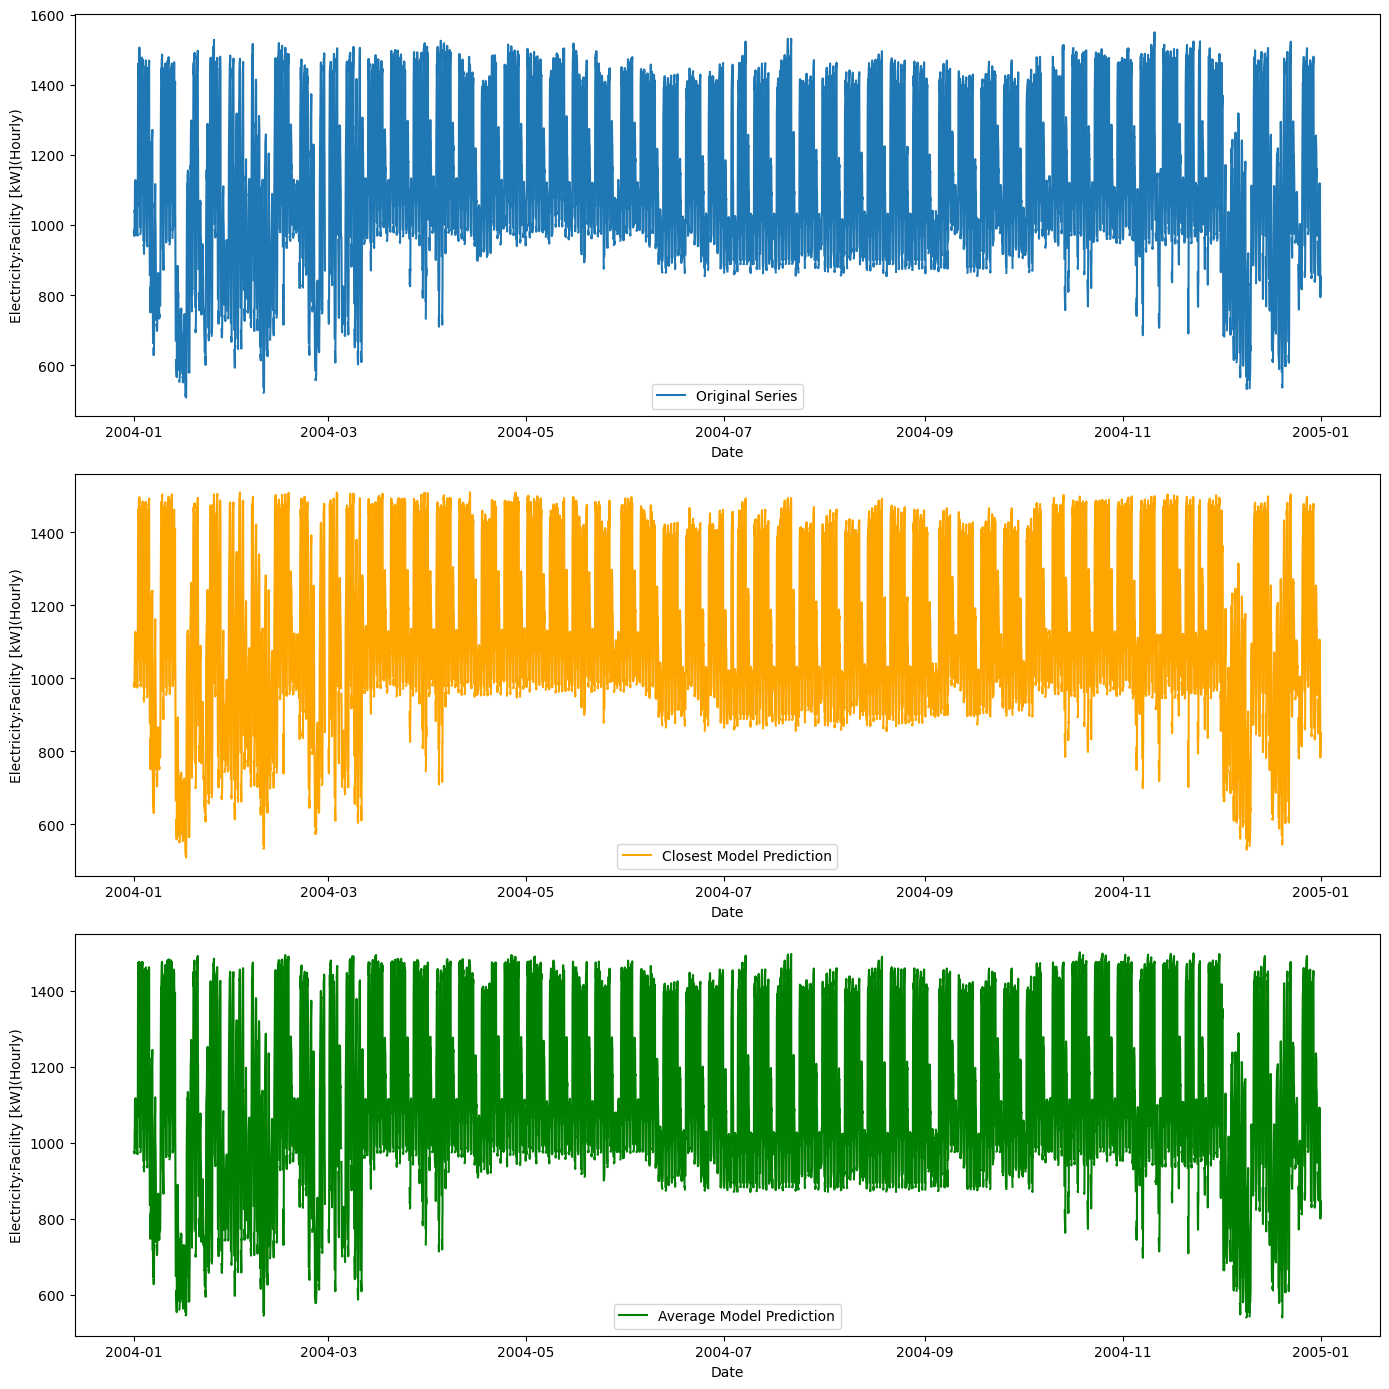

In [55]:
import matplotlib.pyplot as plt
import pandas as pd

# Seleccionar una serie de tiempo representativa para comparar (puedes cambiar el índice [0])
df_serie = closest_dfs[2][0].copy()

# Preprocesamiento de la serie
df_serie["Date/Time"] = pd.to_datetime(df_serie["Date/Time"])
df_serie.set_index("Date/Time", inplace=True)
df_serie['hour'] = df_serie.index.hour
df_serie['day_of_week'] = df_serie.index.dayofweek
df_serie['month'] = df_serie.index.month

X = df_serie.loc[:, columnas].copy()
y = df_serie.loc[:, 'Electricity:Facility [kW](Hourly)'].copy()

# Predicción con el modelo closest
X_scaled_closest = scaler_closest_cluster_2.transform(X)
y_pred_closest = modelo_closest_cluster_2.predict(X_scaled_closest)

# Predicción con el modelo average (usando la misma serie de tiempo)
X_scaled_average = scaler_average_cluster_2.transform(X)
y_pred_average = modelo_average_cluster_2.predict(X_scaled_average)

# Ampliar un intervalo de tiempo más corto para una comparación más clara
start_date = '2004-01-01'
end_date = '2004-01-25'  # Un rango de tiempo más largo para observar las diferencias

# Crear las gráficas
plt.figure(figsize=(14, 14))

# Gráfica 1: Serie Original
plt.subplot(3, 1, 1)
plt.plot(y.index, y, label='Original Series')
plt.xlabel('Date')
plt.ylabel('Electricity:Facility [kW](Hourly)')
plt.legend()

# Gráfica 2: Predicción Closest Model
plt.subplot(3, 1, 2)
plt.plot(y.index, y_pred_closest, label='Closest Model Prediction', color='orange')
plt.xlabel('Date')
plt.ylabel('Electricity:Facility [kW](Hourly)')
plt.legend()

# Gráfica 3: Predicción Average Model
plt.subplot(3, 1, 3)
plt.plot(y.index, y_pred_average, label='Average Model Prediction', color='green')
plt.xlabel('Date')
plt.ylabel('Electricity:Facility [kW](Hourly)')
plt.legend()

# Ajustar el layout
plt.tight_layout()
plt.savefig('../data/images/comparacion_series_tiempo_cluster2.png')
plt.show()


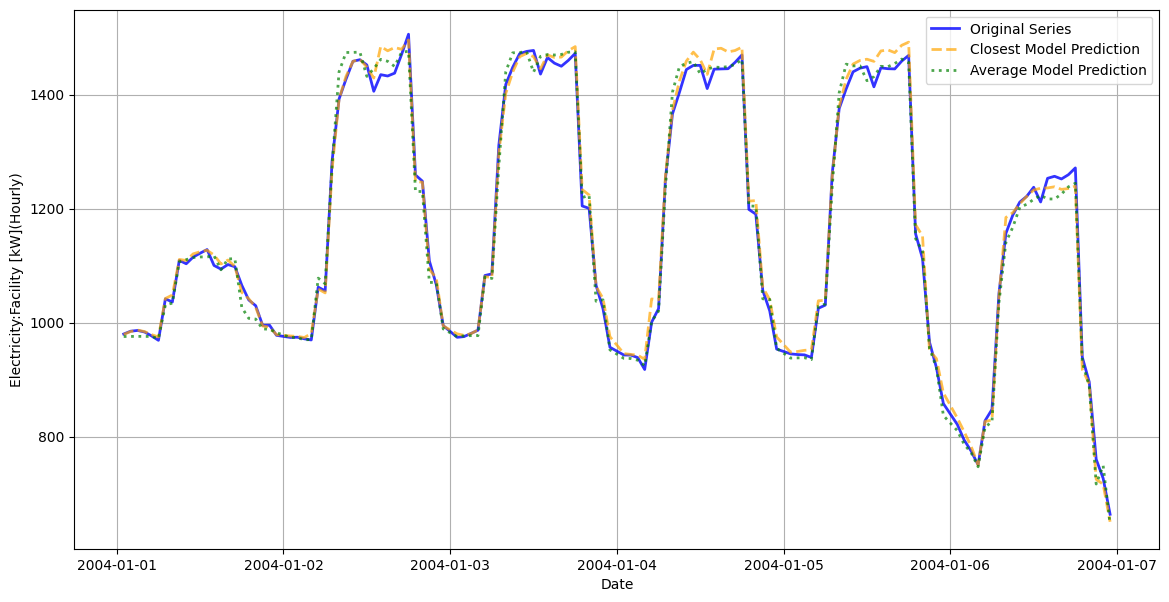

In [56]:
import matplotlib.pyplot as plt

# Ampliar un intervalo de tiempo más corto para una comparación más clara
start_date = '2004-01-01'
end_date = '2004-01-07'  # Un rango de tiempo más largo para observar las diferencias

# Filtrar los datos por este rango
y_filtered = y[(y.index >= start_date) & (y.index <= end_date)]
y_pred_closest_filtered = y_pred_closest[(y.index >= start_date) & (y.index <= end_date)]
y_pred_average_filtered = y_pred_average[(y.index >= start_date) & (y.index <= end_date)]

# Graficar
plt.figure(figsize=(14, 7))

# Serie original
plt.plot(y_filtered.index, y_filtered, label='Original Series', color='blue', alpha=0.8, linewidth=2)

# Predicción del modelo closest
plt.plot(y_filtered.index, y_pred_closest_filtered, label='Closest Model Prediction', color='orange', linestyle='--', alpha=0.7, linewidth=2)

# Predicción del modelo average
plt.plot(y_filtered.index, y_pred_average_filtered, label='Average Model Prediction', color='green', linestyle=':', alpha=0.7, linewidth=2)

plt.xlabel('Date')
plt.ylabel('Electricity:Facility [kW](Hourly)')
plt.legend()
plt.grid(True)
plt.savefig('../data/images/comparacion_series_tiempo_cluster2_filtered.png')
plt.show()

# PRUEBAS CLUSTER 3

## Closest

In [34]:
# Lista de columnas para análisis
columnas = ['Fans:Electricity [kW](Hourly)', 'Cooling:Electricity [kW](Hourly)',
       'InteriorLights:Electricity [kW](Hourly)',
       'InteriorEquipment:Electricity [kW](Hourly)', 'hour', 'day_of_week',
       'month']
to_scale = ['Fans:Electricity [kW](Hourly)', 'Cooling:Electricity [kW](Hourly)',
       'InteriorLights:Electricity [kW](Hourly)',
       'InteriorEquipment:Electricity [kW](Hourly)']
# Inicializar variables para acumular resultados
rmse_list = []
smape_list = []
for df_serie in closest_dfs[3]:
    df=df_serie.dropna().copy()
    df["Date/Time"]=pd.to_datetime(df["Date/Time"])
    df.set_index("Date/Time",inplace=True)
    # Extraer características temporales
    df['hour'] = df.index.hour
    df['day_of_week'] = df.index.dayofweek
    df['month'] = df.index.month
    
    X = df.loc[:, columnas].copy()
    y = df.loc[:, 'Electricity:Facility [kW](Hourly)'].copy()
    
    # Escalar las características
    X.loc[:,to_scale]= scaler_average_cluster_3.transform(X[to_scale])
    # Predecir y calcular métricas de error
    y_pred = modelo_average_cluster_3.predict(X)
    rmse = np.sqrt(mean_squared_error(y, y_pred))
    smape_value = smape(y, y_pred)  # Calcular sMAPE
    
    # Almacenar resultados
    rmse_list.append(rmse)
    smape_list.append(smape_value)

# Calcular promedios de las métricas de error
average_rmse = np.mean(rmse_list)
average_smape = np.mean(smape_list)

# Resultados
results = {
    "Metricas del modelo": {
        'Average RMSE': average_rmse,
        'Average sMAPE (%)': average_smape
    }
}


In [35]:
# Mostrar los resultados
print("Resultados del modelo")
optimized_rf_results_df=pd.DataFrame(results)
optimized_rf_results_df

Resultados del modelo


,Metricas del modelo
Average RMSE,19.459362
Average sMAPE (%),22.320136


In [62]:
rmse_list

[9.066959835535027,
 10.46565449313518,
 68.45180454280451,
 68.74370114605156,
 68.76067719962609]

## Average 

In [36]:
# Lista de columnas para análisis
columnas = ['Fans:Electricity [kW](Hourly)', 'Cooling:Electricity [kW](Hourly)',
       'InteriorLights:Electricity [kW](Hourly)',
       'InteriorEquipment:Electricity [kW](Hourly)', 'hour', 'day_of_week',
       'month']
to_scale = ['Fans:Electricity [kW](Hourly)', 'Cooling:Electricity [kW](Hourly)',
       'InteriorLights:Electricity [kW](Hourly)',
       'InteriorEquipment:Electricity [kW](Hourly)']
# Inicializar variables para acumular resultados
rmse_list = []
smape_list = []
for df_serie in average_dfs[3]:
    df=df_serie.dropna().copy()
    df["Date/Time"]=pd.to_datetime(df["Date/Time"])
    df.set_index("Date/Time",inplace=True)
    # Extraer características temporales
    df['hour'] = df.index.hour
    df['day_of_week'] = df.index.dayofweek
    df['month'] = df.index.month
    
    X = df.loc[:, columnas].copy()
    y = df.loc[:, 'Electricity:Facility [kW](Hourly)'].copy()
    
    # Escalar las características
    X.loc[:,to_scale]= scaler_average_cluster_3.transform(X[to_scale])
    # Predecir y calcular métricas de error
    y_pred = modelo_average_cluster_3.predict(X)
    rmse = np.sqrt(mean_squared_error(y, y_pred))
    smape_value = smape(y, y_pred)  # Calcular sMAPE
    
    # Almacenar resultados
    rmse_list.append(rmse)
    smape_list.append(smape_value)

# Calcular promedios de las métricas de error
average_rmse = np.mean(rmse_list)
average_smape = np.mean(smape_list)

# Resultados
results = {
    "Metricas del modelo": {
        'Average RMSE': average_rmse,
        'Average sMAPE (%)': average_smape
    }
}


In [37]:
# Mostrar los resultados
print("Resultados del modelo")
optimized_rf_results_df=pd.DataFrame(results)
optimized_rf_results_df

Resultados del modelo


,Metricas del modelo
Average RMSE,7.018591
Average sMAPE (%),2.421439


In [38]:
rmse_list

[6.95121975920944,
 7.093272773324884,
 7.74882773660404,
 6.879853412467481,
 6.419781490789823]

Pruebas cluster 4

In [39]:
# Lista de columnas para análisis
columnas = ['Fans:Electricity [kW](Hourly)', 'Cooling:Electricity [kW](Hourly)',
       'InteriorLights:Electricity [kW](Hourly)',
       'InteriorEquipment:Electricity [kW](Hourly)', 'hour', 'day_of_week',
       'month']
to_scale = ['Fans:Electricity [kW](Hourly)', 'Cooling:Electricity [kW](Hourly)',
       'InteriorLights:Electricity [kW](Hourly)',
       'InteriorEquipment:Electricity [kW](Hourly)']
# Inicializar variables para acumular resultados
rmse_list = []
smape_list = []
for df_serie in average_dfs[3]:
    df=df_serie.dropna().copy()
    df["Date/Time"]=pd.to_datetime(df["Date/Time"])
    df.set_index("Date/Time",inplace=True)
    # Extraer características temporales
    df['hour'] = df.index.hour
    df['day_of_week'] = df.index.dayofweek
    df['month'] = df.index.month
    
    X = df.loc[:, columnas].copy()
    y = df.loc[:, 'Electricity:Facility [kW](Hourly)'].copy()
    
    # Escalar las características
    X.loc[:,to_scale]= scaler_average_cluster_4.transform(X[to_scale])
    # Predecir y calcular métricas de error
    y_pred = modelo_average_cluster_4.predict(X)
    rmse = np.sqrt(mean_squared_error(y, y_pred))
    smape_value = smape(y, y_pred)  # Calcular sMAPE
    
    # Almacenar resultados
    rmse_list.append(rmse)
    smape_list.append(smape_value)

# Calcular promedios de las métricas de error
average_rmse = np.mean(rmse_list)
average_smape = np.mean(smape_list)

# Resultados
results = {
    "Metricas del modelo": {
        'Average RMSE': average_rmse,
        'Average sMAPE (%)': average_smape
    }
}

In [40]:
# Mostrar los resultados
print("Resultados del modelo")
optimized_rf_results_df=pd.DataFrame(results)
optimized_rf_results_df

Resultados del modelo


,Metricas del modelo
Average RMSE,327.707101
Average sMAPE (%),63.529858
